In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import yaml
import json
import astropy.units as u
import EXOSIMS
import EXOSIMS.MissionSim as ems
import ebs.error_budget as eb

In [2]:
ebt = eb.ErrorBudget2()

In [3]:
ebt.run_exosims()

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 772084417
Imported SimulatedUniverse (prototype) from EXOSIMS.Prototypes.SimulatedUniverse


/home/pinchen/EXOSIMS-master/EXOSIMS/Prototypes/OpticalSystem.py:1418: UserWarning: core_contrast has smaller OWA than current system value for coronagraph. Updating to match table, but you should check your inputs.
  warnings.warn(


Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported HWOMissionStars (implementation) from EXOSIMS.StarCatalog.HWOMissionStars
Loaded data from /home/pinchen/.EXOSIMS/downloads/HWOStarList_20230523183444.pkl
Imported Nemati (implementation) from EXOSIMS.OpticalSystem.Nemati
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype) from EXOSIMS.Prototypes.Completeness
Imported PlanetPopulation (prototype) from EXOSIMS.Prototypes.PlanetPopulation
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loaded star fluxes values from /home/pinchen/.EXOSIMS/cache/TargetList_HWOMissionStars_nStars_5_mode_305fba0c5e7d27c6e2f3679a361e56ec.star_fluxes
Calculating intCutoff_dMag
intCutoff_dMag values stored in /home/pinchen/.EXOSIMS/cache/Targ

/home/pinchen/EXOSIMS-master/EXOSIMS/MissionSim.py:250: UserWarning: 
Unknown key(s): radDos, Pceff for science instrument CONF_NF_Imager

  warnings.warn(f"\n{out}")
/home/pinchen/EXOSIMS-master/EXOSIMS/MissionSim.py:267: UserWarning: 
The following outspec keywords were not used in any module init:
	  default_vals_extra (Nemati)

  warnings.warn(warnstr)


In [4]:
print(ebt.int_time)

[[       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [0.40758613 0.07688503        nan]] d


In [5]:
positions = ebt.initialize_walkers()

In [6]:
print(positions.shape)

(1000, 13)


(array([  1.,  18.,  58., 154., 287., 249., 160.,  59.,  13.,   1.]),
 array([9.63510825e-07, 9.70764963e-07, 9.78019101e-07, 9.85273239e-07,
        9.92527376e-07, 9.99781514e-07, 1.00703565e-06, 1.01428979e-06,
        1.02154393e-06, 1.02879807e-06, 1.03605220e-06]),
 <BarContainer object of 10 artists>)

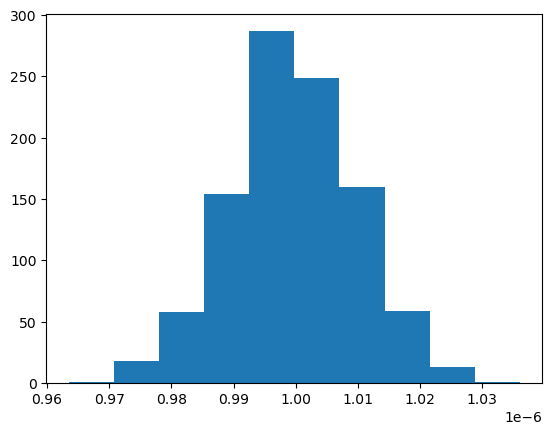

In [7]:
plt.hist(positions[:, 0])

(array([  1.,  14.,  47., 116., 233., 263., 201.,  85.,  29.,  11.]),
 array([0.0095621 , 0.00962593, 0.00968975, 0.00975358, 0.0098174 ,
        0.00988123, 0.00994505, 0.01000888, 0.01007271, 0.01013653,
        0.01020036]),
 <BarContainer object of 10 artists>)

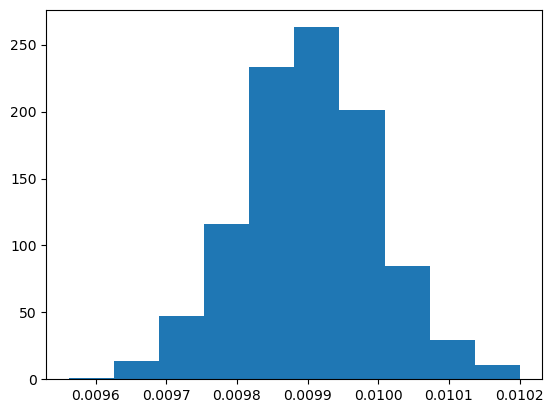

In [8]:
plt.hist(positions[:, -2])

(array([  9.,  41.,  90., 151., 231., 225., 141.,  63.,  37.,  12.]),
 array([9.72437527e-06, 9.78197963e-06, 9.83958399e-06, 9.89718835e-06,
        9.95479271e-06, 1.00123971e-05, 1.00700014e-05, 1.01276058e-05,
        1.01852101e-05, 1.02428145e-05, 1.03004189e-05]),
 <BarContainer object of 10 artists>)

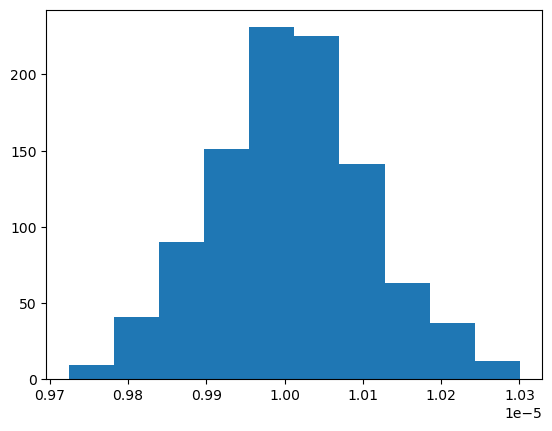

In [9]:
plt.hist(positions[:, -1])

In [10]:
ebt.repack_array('wfsc_factor', np.random.rand(3*4))

(array([0.94684003, 0.31450685, 0.86226508, 0.74424073, 0.48847972,
       0.5888765 , 0.81059504, 0.88424093, 0.58906924, 0.81066698,
       0.21377172, 0.4656381 ]),)
[[9.99990e-07 9.99990e-07 9.99990e-07 9.99990e-07]
 [9.99900e-05 9.99900e-05 9.99900e-05 9.99900e-05]
 [9.90099e-03 9.90099e-03 9.90099e-03 9.90099e-03]
 [        nan         nan         nan         nan]
 [        nan         nan         nan         nan]]
(array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]), array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]))
[[1.e-06 1.e-06 1.e-06 1.e-06]
 [1.e-03 1.e-03 1.e-03 1.e-03]
 [5.e-01 5.e-01 5.e-01 5.e-01]
 [1.e+00 1.e+00 1.e+00 1.e+00]
 [1.e+00 1.e+00 1.e+00 1.e+00]
 [1.e+00 1.e+00 1.e+00 1.e+00]]
[[0.94684003 0.31450685 0.86226508 0.74424073]
 [0.48847972 0.5888765  0.81059504 0.88424093]
 [0.58906924 0.81066698 0.21377172 0.4656381 ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]]


In [11]:
ebt.wfsc_factor

array([[0.94684003, 0.31450685, 0.86226508, 0.74424073],
       [0.48847972, 0.5888765 , 0.81059504, 0.88424093],
       [0.58906924, 0.81066698, 0.21377172, 0.4656381 ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])

In [12]:
for item in ebt.config['mcmc']:
    print(item)

nwalkers
variables


In [13]:
a = np.array([2, 3, 4])
b = np.array([5])
np.concatenate((a, b))

array([2, 3, 4, 5])

In [14]:
np.standard_normal

AttributeError: module 'numpy' has no attribute 'standard_normal'